In [2]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Rows and columns in the dataset
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train["Cabin"].value_counts

<bound method IndexOpsMixin.value_counts of 0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880   

In [7]:
#information from the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# To know which attributes have null in them
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

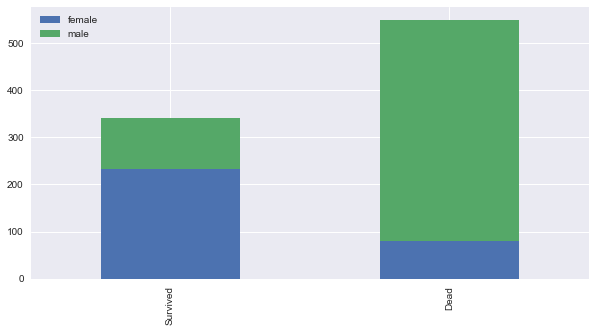

In [12]:
bar_chart('Sex')

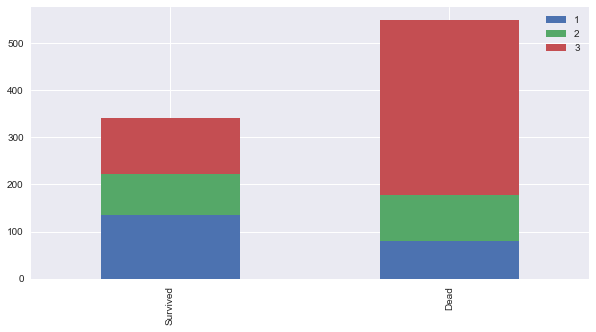

In [13]:
bar_chart('Pclass')

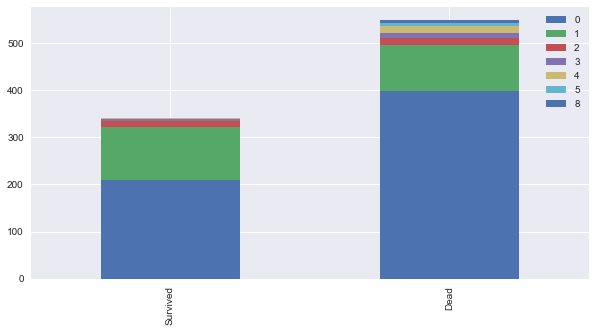

In [14]:
bar_chart('SibSp')

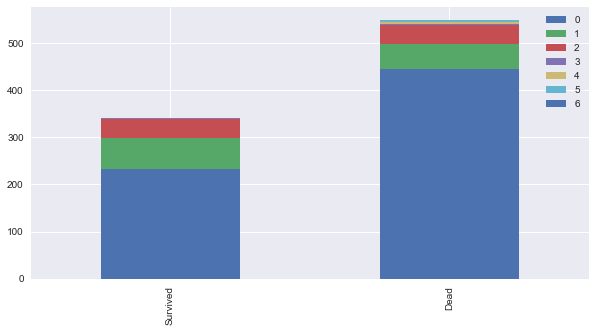

In [15]:
bar_chart('Parch')

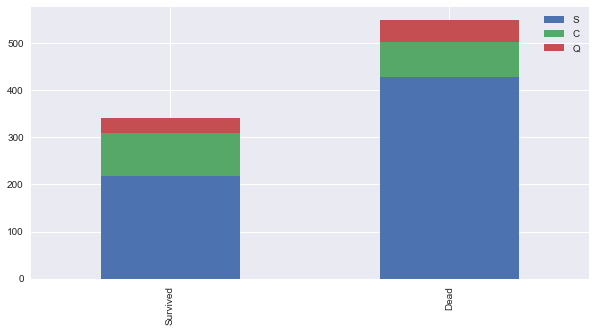

In [16]:
bar_chart('Embarked')

In [17]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Don           1
Mme           1
Sir           1
Lady          1
Countess      1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [20]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Ms":3,"Lady":3,
              "Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


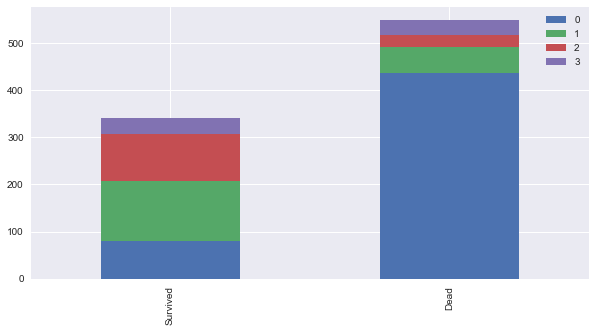

In [23]:
bar_chart('Title')

In [24]:
train.drop('Name',axis=1,inplace=True)

In [25]:
test.drop('Name',axis=1,inplace=True)

In [26]:
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

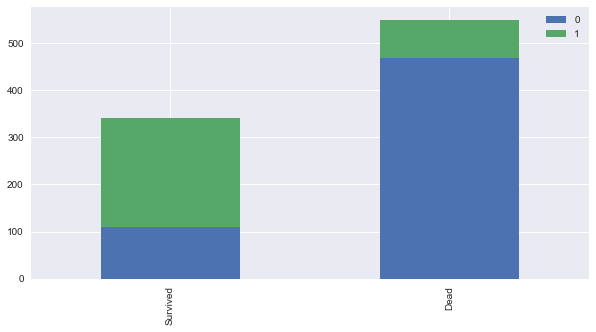

In [27]:
bar_chart('Sex')

In [28]:
# fill age with median age for each title
train['Age'].fillna(train.groupby('Title')['Age'].transform("median"),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"),inplace=True)

In [1]:
#change the values of xlim to observe the data more carefully
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

NameError: name 'sns' is not defined

In [30]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
    dataset.loc[dataset['Age']>62,'Age']=4
    

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


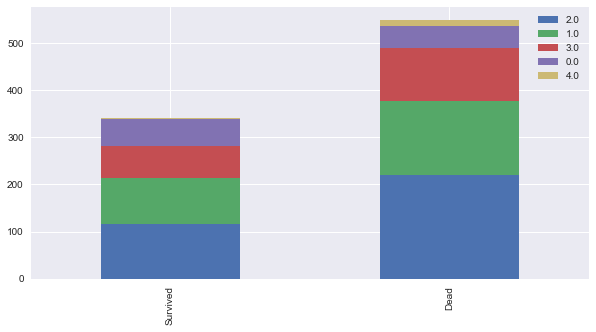

In [32]:
bar_chart('Age')

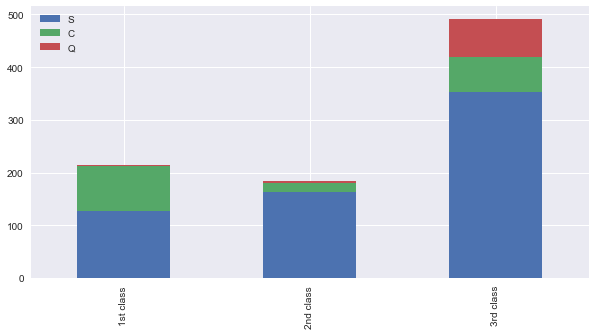

In [33]:
Pclass1=train[train['Pclass']==1]["Embarked"].value_counts()
Pclass2=train[train['Pclass']==2]["Embarked"].value_counts()
Pclass3=train[train['Pclass']==3]["Embarked"].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked=True,figsize=(10,5))

In [34]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [35]:
embarked_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].map(embarked_mapping)

In [36]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

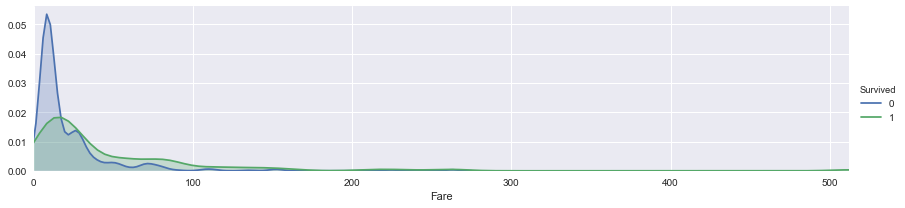

In [37]:
#change the values to get better understanding
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

In [38]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>62,'Fare']=4

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [40]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

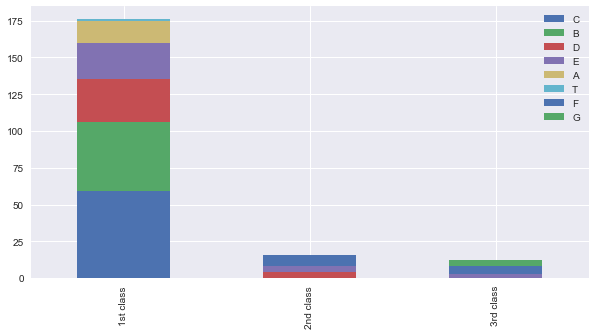

In [41]:
Pclass1=train[train['Pclass']==1]["Cabin"].value_counts()
Pclass2=train[train['Pclass']==2]["Cabin"].value_counts()
Pclass3=train[train['Pclass']==3]["Cabin"].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=["1st class","2nd class","3rd class"]
df.plot(kind="bar",stacked=True,figsize=(10,5))

In [42]:
cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [43]:
train['Cabin'].fillna(train.groupby('Title')['Cabin'].transform("median"),inplace=True)
test['Cabin'].fillna(test.groupby('Title')['Cabin'].transform("median"),inplace=True)

In [44]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
test["FamilySize"]=test["SibSp"]+test["Parch"]+1

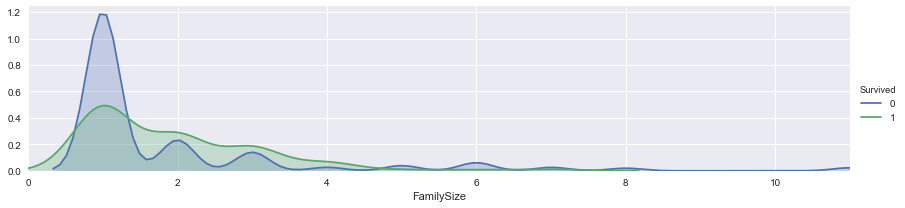

In [45]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

In [46]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset["FamilySize"]=dataset["FamilySize"].map(family_mapping)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0.8,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0.8,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,0.8,0,0,0.0


In [48]:
features_drop=["Ticket","SibSp","Parch"]
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train=train.drop("PassengerId",axis=1)

In [49]:
train_data=train.drop("Survived",axis=1)
target=train["Survived"]

In [50]:
train_data.shape

(891, 8)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True, random_state=0)

In [54]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.84269663 0.79775281
 0.86516854 0.83146067 0.84269663 0.80898876]


In [55]:
round(np.mean(score)*100,2)

82.27

In [56]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.80898876 0.76404494 0.7752809  0.88764045 0.76404494
 0.84269663 0.82022472 0.74157303 0.79775281]


In [57]:
np.mean(score)*100

79.80024968789014

In [58]:
clf=RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.82022472 0.80898876 0.79775281 0.86516854 0.82022472
 0.82022472 0.80898876 0.75280899 0.83146067]


In [59]:
np.mean(score)*100

81.14731585518102

In [60]:
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.81111111 0.76404494 0.80898876 0.75280899 0.75280899 0.79775281
 0.82022472 0.83146067 0.80898876 0.84269663]


In [61]:
np.mean(score)*100

79.90886392009988

In [62]:
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.80898876 0.82022472 0.82022472 0.84269663 0.82022472
 0.84269663 0.86516854 0.84269663 0.85393258]


In [63]:
np.mean(score)*100

83.50187265917603

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [72]:
clf.fit(train_data,target)
test_data=test.drop('PassengerId',axis=1)
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,0.8,2,0,0.0
1,3,1,3.0,0.0,0.8,0,2,0.4
2,2,0,3.0,0.0,0.8,2,0,0.0
3,3,0,2.0,0.0,0.8,0,0,0.0
4,3,1,1.0,0.0,0.8,0,2,0.8


In [66]:
prediction=clf.predict(test_data)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [68]:
submission=pd.DataFrame(
    {"PassengerId":test["PassengerId"],
    "Survived":prediction
    })

In [69]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [70]:
submission.to_csv("Submission4.csv",index=False)